## Instituto Federal da Paraiba.
## Aluna: Marília de A. S. Oliveira.


In [3]:
# Importação das bibliotecas necessárias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
police = pd.read_csv("police.csv")
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


## a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos registros policiais estão catalogados;

In [5]:
# Para daber quantos registros o dataFrame possue uso o .count para fazer a contagem das linhas
registros = police[police.columns[0]].count()

# A função dropna anula valores nulos do df, passando o parametro how = "all" ele irá analizar 
# todas as minhas colunas e não valores isolados, ja que axis = 1
# O len apenas conta a quantidade de colunas quee n foram excluidas
variaveis = len(police.dropna(axis=1, how ="all", inplace=False).columns)

print("Quantidade de registros: {}\nQuantidade de variaveis: {}".format(registros, variaveis))

Quantidade de registros: 91741
Quantidade de variaveis: 14


### (b) Conte o número de dados faltosos de cada variável;

In [6]:

# Com o isnull podemmos analizar quais valores do nosso df são nulos ou não
#  O retor é boleano "True" ou "False", utilizo o .sum() para apenas fazer a contagem.
dadosFaltosos = police.isnull().sum()

df = pd.DataFrame(dadosFaltosos)
df

,0
state,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5205
driver_race,5202
violation_raw,5202
violation,5202
search_conducted,0
search_type,88434


### (c) Como estamos trabalhando somente com dados de um único estado, não faz sentido mantermos informações de variáveis como county_name e state. Exclua essas variáveis do conjunto;

In [7]:
# Utilizo o .drop() para eliminar as colunas desncessárias, o inplace, é para que a atualização ocorra
# na matriz do df original.

police.drop(columns=["county_name", "state"], inplace=True)
police.head(5)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### (d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises. Como apenas uma pequena fração das linhas está faltando driver_gender, remova essas linhas do conjunto de dados;

In [8]:
# Passando com argumento o subset que separa a analize por coluna eu analiso quais linhas tem
# seus valovores nulos com refÊncia na linha definida

police.dropna(subset=['driver_gender'], how='any',axis=0, inplace = True)

dadosFaltosos = police.isnull().sum()

df = pd.DataFrame(dadosFaltosos)
df


,0
stop_date,0
stop_time,0
driver_gender,0
driver_race,0
violation_raw,0
violation,0
search_conducted,0
search_type,83229
stop_outcome,0
is_arrested,0


### (e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted, is_arrested e district; depois compare com os tipos de dados que estão armazenados no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados para essas variáveis;

In [9]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


### (f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas: stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [10]:
# faço a junção do dataframe usando .agg() que aplica o join nas colunas que foram passadas.
police['stop_datetime'] = police[['stop_date', 'stop_time']].agg(' '.join, axis=1)

# fazendo a conversão para datatime.
police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])

police.head(5)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


### (g) Por fim, transforme a coluna stop_datetime no índice do dataframe.

In [11]:
# O set index me permite passar uma coluna como referência para o indice.
police.set_index('stop_datetime', inplace = True)

police.head(5)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### 2. Análise do gênero sobre as infrações
### O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito? Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito mais!

### (a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados. Construa uma distribuição de frequências da variável violation e responda: qual a infração mais comum e a menos notificada?


In [44]:
# Para fazer a distribuição utilizo a def de destribuição de frequência.

# primerio criamos uma def em que seu valor irá apontar para um dicionário.
def frequenciaAbsoluta(x) -> dict:

    # crio um dicionário vazio para armazenar nos valores
    hist = {}
    for i in x:
        # recebo o valor caso ele exista
        hist[i] = hist.get(i, 0) + 1
    # retorno o dicionário
    return hist

    
    

,frequencia
Equipment,10921
Speeding,48423
Other,4409
Moving violation,16224
Registration/plates,3703
Seat belt,2856


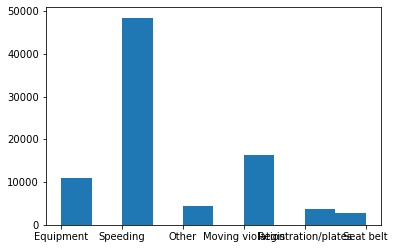

In [78]:
#  Apresento um grafico penas para melhor compreenssão
b = plt.hist(police['violation'])

a = frequenciaAbsoluta(police['violation'])

pd.DataFrame(data= a.values(), index=a.keys(), columns=["frequencia"])


### (b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.


In [128]:
# o crosstab faz a tabela de frequência dos valores.
frequencias = pd.crosstab(police['violation'], police['driver_gender'], margins= True, rownames= ['']) / 100

frequencias

driver_gender,F,M,All
,,,
Equipment,25.01%,84.20%,109.21%
Moving violation,32.86%,129.38%,162.24%
Other,7.07%,37.02%,44.09%
Registration/plates,10.56%,26.47%,37.03%
Seat belt,5.78%,22.78%,28.56%
Speeding,156.46%,327.77%,484.23%
All,237.74%,627.62%,865.36%


### (c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;


<AxesSubplot:>

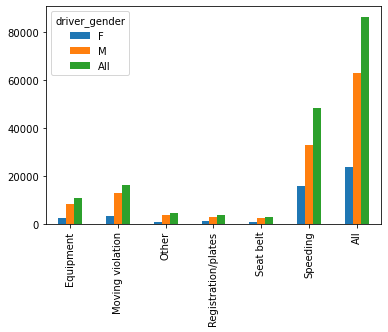

In [93]:
frequencias.plot.bar()

### (d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);

In [130]:
# o crosstab faz a tabela de frequência dos valores.
frequencias = pd.crosstab(police['driver_gender'], police['stop_outcome'], normalize= True, margins=True)

# filtrando apenas as colunas necessárias.
display(frequencias[["Citation", 'Warning']])

print("A tabela mostra que mulheres cometem menos infrações que homens, tanto em\
Citation quanto em Warning.")

stop_outcome,Citation,Warning
driver_gender,,
F,0.25%,0.02%
M,0.65%,0.04%
All,0.89%,0.06%


A tabela mostra que mulheres cometem menos infrações que homens, tanto emCitation quanto em Warning.


### (e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta, primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo;

Como mostra o gráfico abaixo a maior quantidade de pessoas paradas são homens


<AxesSubplot:>

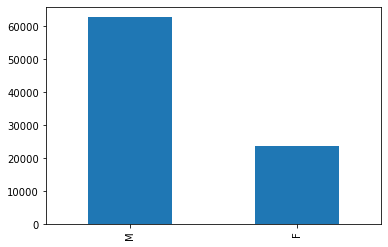

In [121]:
print("Como mostra o gráfico abaixo a maior quantidade de pessoas paradas são homens")
quant = police["driver_gender"].value_counts()
quant.plot.bar()

### (f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo tempo usando groupby;


In [155]:
police.groupby("driver_gender").search_conducted.value_counts(normalize = True)



driver_gender  search_conducted
F              False              0.98%
               True               0.02%
M              False              0.95%
               True               0.05%
Name: search_conducted, dtype: float64

### (g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

In [148]:
police.groupby("driver_gender").violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding              0.66%
               Moving violation      0.14%
               Equipment             0.11%
               Registration/plates   0.04%
               Other                 0.03%
               Seat belt             0.02%
M              Speeding              0.52%
               Moving violation      0.21%
               Equipment             0.13%
               Other                 0.06%
               Registration/plates   0.04%
               Seat belt             0.04%
Name: violation, dtype: float64

### 3. Análise exploratória visual dos dados 
### É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender as tendências de uma forma que o exame dos dados brutos não pode.

### (a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested ;

In [158]:
quant = police['is_arrested'].mean()

print("porcentagem de pessoas presas: {}".format(quant))

porcentagem de pessoas presas: 0.0355690117407784


### (b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso, agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;


In [162]:
hourly_arrest_rate = police.groupby(police.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0    0.05%
1    0.06%
2    0.06%
3    0.06%
4    0.05%
5    0.04%
6    0.01%
7    0.01%
8    0.02%
9    0.03%
10   0.03%
11   0.03%
12   0.04%
13   0.03%
14   0.03%
15   0.03%
16   0.04%
17   0.04%
18   0.04%
19   0.03%
20   0.04%
21   0.06%
22   0.05%
23   0.05%
Name: is_arrested, dtype: float64

### (c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora do Dia;

<AxesSubplot:xlabel='stop_datetime'>

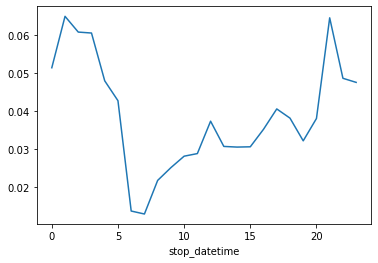

In [163]:
hourly_arrest_rate.plot()

### (d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica se drogas foram encontradas durante uma determinada parada. Você calculará a taxa anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para visualizar como a taxa mudou ao longo do tempo;


<AxesSubplot:xlabel='stop_datetime'>

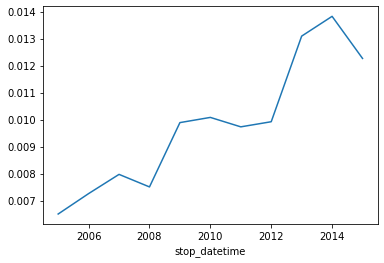

In [171]:
a = police.groupby(police.index.year).drugs_related_stop.mean()

a.plot()



### (e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos. Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os dados desse resultado da concatenação;


<AxesSubplot:xlabel='stop_datetime'>

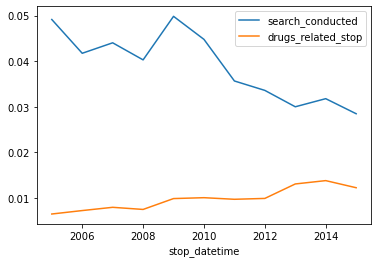

In [187]:
a = police[["search_conducted", "drugs_related_stop"]].groupby(police.index.year).mean()
a.plot()

### (f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais infrações são detectadas pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas ’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados obtido na tabela, e responda a questão colocada.

<AxesSubplot:xlabel='district'>

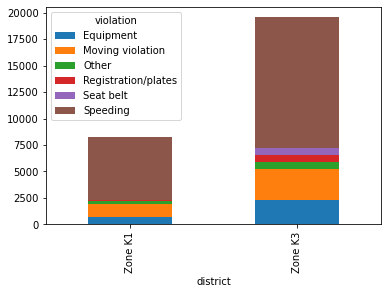

In [191]:
freq = pd.crosstab(police["district"], police['violation'])
freq.loc[["Zone K1", "Zone K3"]].plot.bar(stacked=True)

### 4. Analisando o efeito do clima no policiamento
### Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar o impacto das condições meteorológicas no comportamento da polícia durante as paradas de trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.

### (a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as principais medidas resumo usando o comando describe e plote os três boxplots dessas variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se de que a temperatura é medida em graus Fahrenheit, não Celsius!


In [196]:
weather = pd.read_csv("weather.csv")
weather.head(5)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.00%,35,53,8.95%,25.10%,1.00%,NaN,NaN,...,NaN,1.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.00%,28,44,9.40%,14.10%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00%,NaN,1.00%,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.00%,44,53,6.93%,17.00%,1.00%,NaN,NaN,...,NaN,1.00%,NaN,NaN,1.00%,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.00%,39,45,6.93%,16.10%,1.00%,NaN,NaN,...,NaN,1.00%,1.00%,NaN,1.00%,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.00%,28,43,7.83%,17.00%,1.00%,NaN,NaN,...,NaN,1.00%,NaN,NaN,1.00%,NaN,1.00%,NaN,NaN,NaN


,TAVG,TMIN,TMAX
count,"1,217.00%","4,017.00%","4,017.00%"
mean,52.49%,43.48%,61.27%
std,17.83%,17.02%,18.20%
min,6.00%,-5.00%,15.00%
25%,39.00%,30.00%,47.00%
50%,54.00%,44.00%,62.00%
75%,68.00%,58.00%,77.00%
max,86.00%,77.00%,102.00%


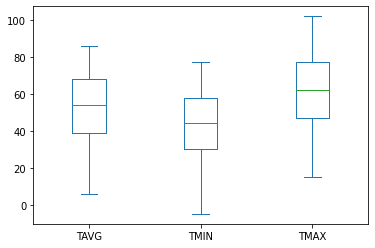

In [205]:
vir = weather[['TAVG', 'TMIN', 'TMAX']]
vir.plot.box()
display(vir.describe())

### (b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a distribuição de dados?

(array([171., 366., 662., 982., 950., 539., 241.,  85.,  16.,   5.]),
 array([ 2. ,  6.1, 10.2, 14.3, 18.4, 22.5, 26.6, 30.7, 34.8, 38.9, 43. ]),
 <BarContainer object of 10 artists>)

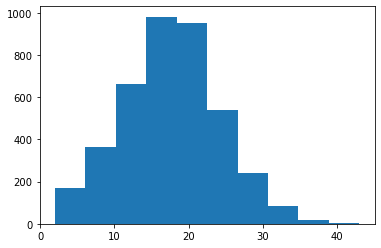

In [201]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
plt.hist(weather['TDIFF'])

### (c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;


In [207]:
police.reset_index(inplace=True)

data = weather["DATE"]

### (d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime novamente como o índice;


In [223]:
newDf = pd.merge(police, weather, left_index=True, right_index=True).set_index('stop_datetime')
newDf

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,1.00%,NaN,1.00%,NaN,NaN,NaN,16
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.00%,NaN,NaN,1.00%,NaN,NaN,NaN,NaN,NaN,9
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,1.00%,1.00%,NaN,1.00%,NaN,NaN,NaN,NaN,NaN,6
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.00%,NaN,NaN,1.00%,NaN,1.00%,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-22 10:06:00,2006-02-22,10:06,F,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2006-02-22 10:10:00,2006-02-22,10:10,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2006-02-22 10:10:00,2006-02-22,10:10,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


### (e) A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.

In [225]:
# Verificando se a cor da pele influencia na abordagem policial

display(newDf.groupby("driver_race").violation.value_counts(normalize = True))

# Verificando os valors nulos:

dadosFaltosos = newDf.isnull().sum()

df = pd.DataFrame(dadosFaltosos)
df





driver_race  violation          
Asian        Speeding              0.87%
             Moving violation      0.06%
             Equipment             0.04%
             Other                 0.02%
             Registration/plates   0.01%
Black        Speeding              0.54%
             Moving violation      0.19%
             Equipment             0.13%
             Registration/plates   0.11%
             Other                 0.03%
Hispanic     Speeding              0.56%
             Moving violation      0.14%
             Equipment             0.13%
             Registration/plates   0.12%
             Other                 0.05%
Other        Speeding              0.78%
             Moving violation      0.17%
             Registration/plates   0.06%
White        Speeding              0.78%
             Moving violation      0.12%
             Equipment             0.05%
             Registration/plates   0.03%
             Other                 0.02%
Name: violation, dtype: 

,0
stop_date,0
stop_time,0
driver_gender,0
driver_race,0
violation_raw,0
violation,0
search_conducted,0
search_type,3831
stop_outcome,0
is_arrested,0
